In [1]:
file = open("./result/size1/problem2.out")

# reading the file as a list line by line
content = file.readlines()

# closing the file
file.close()

In [2]:
content

['\n',
 'ff: parsing domain file\n',
 "domain 'BLOCKS' defined\n",
 ' ... done.\n',
 'ff: parsing problem file\n',
 "problem 'PB2' defined\n",
 ' ... done.\n',
 '\n',
 '\n',
 'no metric specified. plan length assumed.\n',
 '\n',
 'checking for cyclic := effects --- OK.\n',
 '\n',
 'ff: search configuration is EHC, if that fails then  best-first on 1*g(s) + 5*h(s) where\n',
 '    metric is  plan length\n',
 '\n',
 'ff: found legal plan as follows\n',
 '\n',
 'step \n',
 '\n',
 'time spent:    0.00 seconds instantiating 4 easy, 0 hard action templates\n',
 '               0.00 seconds reachability analysis, yielding 5 facts and 4 actions\n',
 '               0.00 seconds creating final representation with 5 relevant facts, 0 relevant fluents\n',
 '               0.00 seconds computing LNF\n',
 '               0.00 seconds building connectivity graph\n',
 '               0.00 seconds searching, evaluating 1 states, to a max depth of 0\n',
 '               0.00 seconds total time\n',
 '\n'

In [3]:
z = content[-2][:content[-2].find('seconds')]
float(z)

0.0

In [4]:
def extract(filename):
    file = open(filename)

    # reading the file as a list line by line
    content = file.readlines()
    
    plan_length = 0
    # closing the file
    file.close()
    i = 0
    part = None
    num_nodes_expanded = []
    for i in range(len(content)):
        if 'Cueing down from goal distance' in content[i]:
            ele = content[i]
            z = ele[ele.find(':')+1:ele.find('into')]
#             print(int(z))
            plan_length = int(z)
        
        if 'time spent' in content[i]:
            part = content[i:]
            part[0] = part[0].replace('time spent:', '')
            
        if '[1]' in content[i]:
            steps = ''
            ele = content[i]
#             print(ele[-3].isdigit())
            trace = -3
            while ele[trace].isdigit():
                steps = ele[trace] + steps
                trace -= 1
#             print(int(steps))
                num_nodes_expanded.append(int(steps))

    if part:
        # print(part)
        result = []
        for ele in part:
            z = ele[:ele.find('seconds')]
#             print(float(z))
            try:
                result.append(float(z))
            except:
                pass
        return result, plan_length, sum(num_nodes_expanded)
    
    return None

In [5]:
x = extract("./result/size5/problem2.out")
x

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 10, 14)

In [6]:
prob_sizes, instantiating, reachability, final_representation, LNF, connectivity, searching, total  = [], [], [], [], [], [], [], []
nodes_expanded, plan_lengths = [], []
problem_size = 10
sizes = [i+1 for i in range(30)]

for i in sizes:
    for j in range(problem_size):
        f_name = "./result/size{}/problem{}.out".format(i, j)
        try:
            res, pl, ne = extract(f_name)
            if res:
                prob_sizes.append(i)
                instantiating.append(res[0])
                reachability.append(res[1])
                final_representation.append(res[2])
                LNF.append(res[3])
                connectivity.append(res[4])
                searching.append(res[5])
                total.append(res[6])
                nodes_expanded.append(pl)
                plan_lengths.append(ne)
        except:
            pass


In [7]:
f = open("result.csv", "a")
f.write('pb size, init time, reach time, representation time, LNF time, connectivity time, searching time, total time, nodes expanded, plan length\n')
for i in range(len(prob_sizes)):
    f.write('{}, {}, {}, {}, {}, {}, {}, {}, {}, {}\n'.format(prob_sizes[i], instantiating[i], reachability[i], final_representation[i], LNF[i], connectivity[i], searching[i], total[i], nodes_expanded[i], plan_lengths[i]))
f.close()

In [8]:
import pandas as pd
df = pd.read_csv('result.csv')
df.head(10)

,pb size,init time,reach time,representation time,LNF time,connectivity time,searching time,total time,nodes expanded,plan length
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


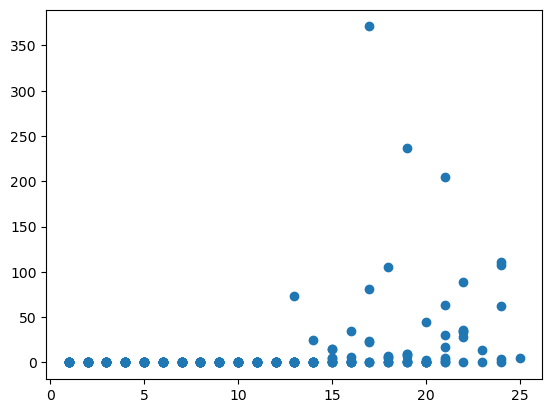

In [9]:
import matplotlib.pyplot as plt
plt.scatter(prob_sizes, total)
plt.show()

In [10]:
result = dict()
sz = df['pb size']
total_time = df[' total time']
nodes = df[' nodes expanded']
plans_lengths = df[' plan length']
for i, size in enumerate(sz):
    if size in result:
        result[size]['time'].append(total_time[i])
        result[size]['nodes'].append(nodes[i])
        result[size]['length'].append(plans_lengths[i])
    else:
        result[size] = dict()
        result[size]['time'] = [total_time[i]]
        result[size]['nodes'] = [nodes[i]]
        result[size]['length'] = [plans_lengths[i]]

In [11]:
result

{1: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  'length': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 2: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [2, 4, 2, 2, 2, 0, 4, 2, 4, 0],
  'length': [2, 4, 2, 2, 2, 0, 4, 2, 4, 0]},
 3: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [6, 4, 2, 2, 4, 4, 4, 4, 2, 6],
  'length': [6, 6, 2, 2, 6, 4, 6, 8, 2, 6]},
 4: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [4, 4, 4, 6, 6, 6, 8, 5, 6, 4],
  'length': [4, 8, 4, 12, 6, 6, 12, 8, 12, 4]},
 5: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [6, 8, 10, 10, 9, 6, 8, 10, 7, 6],
  'length': [6, 14, 14, 16, 16, 6, 10, 14, 10, 6]},
 6: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [11, 9, 10, 9, 10, 9, 7, 10, 9, 10],
  'length': [14, 16, 18, 32, 16, 16, 20, 16, 12, 18]},
 7: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [12]:
num_result = dict()
node_result = dict()
length_result = dict()
for k, v in result.items():
    try:
        new_v = [float(ele) for ele in v['time']]
        num_result[k] = new_v
        node_result[k] = v['nodes']
        length_result[k] = v['length']
    except:
        print(k, v)
    

In [13]:
length_result

{1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 2: [2, 4, 2, 2, 2, 0, 4, 2, 4, 0],
 3: [6, 6, 2, 2, 6, 4, 6, 8, 2, 6],
 4: [4, 8, 4, 12, 6, 6, 12, 8, 12, 4],
 5: [6, 14, 14, 16, 16, 6, 10, 14, 10, 6],
 6: [14, 16, 18, 32, 16, 16, 20, 16, 12, 18],
 7: [14, 18, 26, 20, 12, 20, 12, 24, 10, 12],
 8: [20, 20, 59, 20, 14, 14, 58, 14, 39, 22],
 9: [38, 28, 20, 55, 20, 32, 24, 32, 28, 38],
 10: [44, 41, 57, 41, 44, 48, 38, 57, 48, 45],
 11: [77, 34, 38, 44, 28, 38, 34, 63, 28, 44],
 12: [36, 67, 44, 38, 34, 24, 42, 30, 24, 38],
 13: [28, 43, 43, 40, 50, 88, 40, 28, 40, 78],
 14: [56, 61, 56, 61, 70, 36, 36, 95, 24],
 15: [53, 54, 81, 58, 54, 53, 81, 64, 81],
 16: [59, 92, 72, 59, 80, 76, 34, 96],
 17: [99, 71, 56, 69, 99, 62, 97],
 18: [89, 77, 98, 113, 74, 52, 113],
 19: [62, 78, 97, 62, 62, 91, 98, 98],
 20: [64, 88, 76, 72, 72, 72, 94, 86],
 21: [113, 102, 72, 70, 74, 122, 119, 95],
 22: [88, 88, 101, 105, 88, 70],
 23: [129, 100],
 24: [111, 126, 126, 107, 62],
 25: [90]}

In [14]:
import json
file = open('experiment_result_1_200.json')
htn = json.load(file)
htn

{'1': {'0': [2.09808349609375e-05, 0, 2],
  '1': [1.3113021850585938e-05, 0, 2],
  '2': [1.2874603271484375e-05, 0, 2],
  '3': [1.4066696166992188e-05, 0, 2],
  '4': [1.0967254638671875e-05, 0, 2],
  '5': [1.4781951904296875e-05, 0, 2],
  '6': [1.2874603271484375e-05, 0, 2],
  '7': [1.1920928955078125e-05, 0, 2],
  '8': [1.2159347534179688e-05, 0, 2],
  '9': [1.0967254638671875e-05, 0, 2]},
 '2': {'0': [0.0003070831298828125, 2, 8],
  '1': [0.00014638900756835938, 4, 14],
  '2': [9.298324584960938e-05, 2, 8],
  '3': [7.915496826171875e-05, 2, 8],
  '4': [8.106231689453125e-05, 2, 8],
  '5': [1.3828277587890625e-05, 0, 2],
  '6': [0.0001399517059326172, 4, 14],
  '7': [8.916854858398438e-05, 2, 8],
  '8': [0.0001800060272216797, 4, 14],
  '9': [1.4066696166992188e-05, 0, 2]},
 '3': {'0': [0.00020074844360351562, 6, 20],
  '1': [0.00022602081298828125, 6, 20],
  '2': [0.0001289844512939453, 2, 8],
  '3': [0.00010085105895996094, 2, 8],
  '4': [0.00020194053649902344, 6, 20],
  '5': [0.00

In [15]:
# num_result = dict()
# node_result = dict()
# length_result = dict()
htn_result = dict()
htn_node_result = dict()
htn_length_result = dict()

for k, v in htn.items():
    time, expand, length = [], [], []
    for k1, v1 in v.items():
        time.append(v1[0])
        length.append(v1[1])
        expand.append(v1[2])
    htn_result[k] = time
    htn_node_result[k] = expand
    htn_length_result[k] = length
    


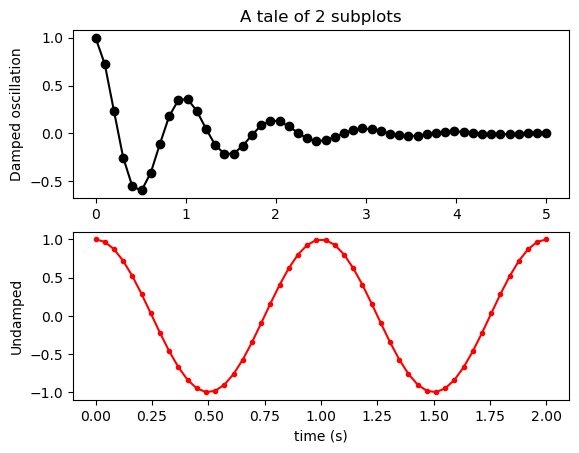

In [16]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'ko-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')


plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

In [17]:
htn_length_result['1']

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
node_result

{1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 2: [2, 4, 2, 2, 2, 0, 4, 2, 4, 0],
 3: [6, 4, 2, 2, 4, 4, 4, 4, 2, 6],
 4: [4, 4, 4, 6, 6, 6, 8, 5, 6, 4],
 5: [6, 8, 10, 10, 9, 6, 8, 10, 7, 6],
 6: [11, 9, 10, 9, 10, 9, 7, 10, 9, 10],
 7: [10, 14, 12, 14, 12, 12, 8, 13, 10, 12],
 8: [13, 13, 16, 12, 14, 14, 15, 14, 14, 15],
 9: [18, 17, 18, 18, 17, 16, 18, 16, 17, 16],
 10: [18, 15, 20, 15, 18, 20, 18, 20, 20, 17],
 11: [19, 19, 17, 22, 20, 21, 17, 20, 16, 22],
 12: [22, 24, 24, 23, 22, 20, 20, 23, 20, 20],
 13: [22, 26, 26, 20, 26, 23, 20, 22, 20, 22],
 14: [26, 28, 26, 28, 24, 22, 22, 28, 22],
 15: [27, 26, 26, 30, 26, 27, 25, 28, 25],
 16: [25, 26, 28, 25, 30, 27, 30, 30],
 17: [33, 32, 34, 34, 33, 32, 32],
 18: [35, 32, 31, 35, 34, 28, 35],
 19: [34, 36, 33, 34, 32, 36, 34, 34],
 20: [40, 38, 39, 38, 38, 38, 35, 40],
 21: [38, 40, 35, 40, 37, 37, 42, 40],
 22: [43, 43, 39, 40, 43, 42],
 23: [46, 44],
 24: [46, 46, 46, 44, 43],
 25: [46]}

# Calculate the median and mean runtime

In [20]:
import statistics
problem_size = []
median, mean, maximum, minimum = [], [], [], []
metric_median, metric_mean, metric_maximum, metric_minimum = [], [], [], []
metric_length_median, metric_length_mean, metric_length_maximum, metric_length_minimum = [], [], [], []

htn_median, htn_mean, htn_maximum, htn_minimum = [], [], [], []
htn_node_median, htn_node_mean, htn_node_maximum, htn_node_minimum = [], [], [], []
htn_length_median, htn_length_mean, htn_length_maximum, htn_length_minimum = [], [], [], []
for k, v in num_result.items():
    problem_size.append(k)
    median.append(statistics.median(v))
    mean.append(statistics.mean(v))
    maximum.append(max(v))
    minimum.append(min(v))
    metric_median.append(statistics.median(node_result[k]))
    metric_mean.append(statistics.mean(node_result[k]))
    metric_maximum.append(max(node_result[k]))
    metric_minimum.append(min(node_result[k]))
    
    metric_length_median.append(statistics.median(length_result[k]))
    metric_length_mean.append(statistics.mean(length_result[k]))
    metric_length_maximum.append(max(length_result[k]))
    metric_length_minimum.append(min(length_result[k]))
    
    htn_median.append(statistics.median(htn_result[str(k)]))
    htn_mean.append(statistics.mean(htn_result[str(k)]))
    htn_maximum.append(max(htn_result[str(k)]))
    htn_minimum.append(min(htn_result[str(k)]))
    
    htn_node_median.append(statistics.median(htn_node_result[str(k)]))
    htn_node_mean.append(statistics.mean(htn_node_result[str(k)]))
    htn_node_maximum.append(max(htn_node_result[str(k)]))
    htn_node_minimum.append(min(htn_node_result[str(k)]))
    
    htn_length_median.append(statistics.median(htn_length_result[str(k)]))
    htn_length_mean.append(statistics.mean(htn_length_result[str(k)]))
    htn_length_maximum.append(max(htn_length_result[str(k)]))
    htn_length_minimum.append(min(htn_length_result[str(k)]))
    
    

In [21]:
metric_std = [np.std(v) for k, v in num_result.items()]
htn_std = [np.std(v) for k, v in htn_result.items() if int(k) <=25]

/var/folders/xq/1kk_rbdx02db5wnrjs1lsrb80000gn/T/ipykernel_32582/1127903221.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(problem_size, metric_mean, yerr=metric_std, fmt='o', capsize=5, ecolor='red', marker='s', mfc='blue', mec='blue', ms=5, linestyle='--', lw=1, label='MetricFF')
/var/folders/xq/1kk_rbdx02db5wnrjs1lsrb80000gn/T/ipykernel_32582/1127903221.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(problem_size, htn_mean, yerr=htn_std, fmt='o', capsize=5, ecolor='green', marker='o', mfc='orange', mec='orange', ms=5, linestyle='-', lw=1, label='HTN')


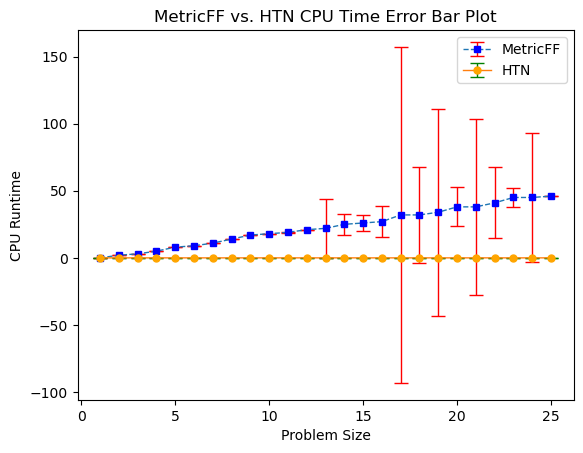

In [26]:
# Plot error bar now
import matplotlib.pyplot as plt
import numpy as np



# Create the error bar plot for y1
plt.errorbar(problem_size, metric_mean, yerr=metric_std, fmt='o', capsize=5, ecolor='red', marker='s', mfc='blue', mec='blue', ms=5, linestyle='--', lw=1, label='MetricFF')

# Create the error bar plot for y2
plt.errorbar(problem_size, htn_mean, yerr=htn_std, fmt='o', capsize=5, ecolor='green', marker='o', mfc='orange', mec='orange', ms=5, linestyle='-', lw=1, label='HTN')

# Customize the plot
plt.xlabel('Problem Size')
plt.ylabel('CPU Runtime')
plt.title('MetricFF vs. HTN CPU Time Error Bar Plot')
plt.legend()
plt.savefig('runtime.png')
# Display the plot
plt.show()

In [82]:
j = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
for ele in j:
    print(htn_length_mean[ele-1])

14.2
21.4
27.2
28.8
40.8
48.6
51.4
56.8
64.2
68.6


In [35]:
mean[23]

56.92

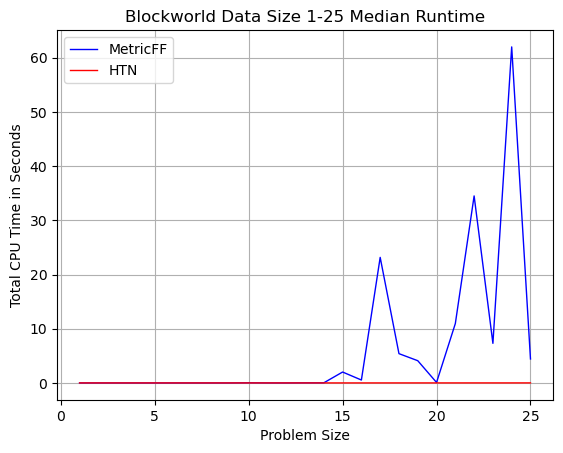

In [23]:
import matplotlib.pyplot as plt
plt.title("Blockworld Data Size 1-25 Median Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

plt.plot(problem_size, median, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_median, color='red', linewidth = 1,  label = 'HTN')
# show a legend on the plot
plt.legend()

# plt.plot(problem_size, median)
plt.grid()
plt.savefig('bw_median.png')
plt.show()

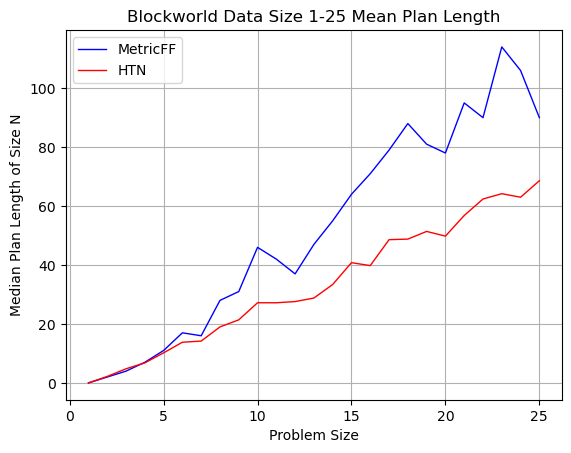

In [24]:
plt.title("Blockworld Data Size 1-25 Mean Plan Length")
plt.xlabel("Problem Size")
plt.ylabel("Median Plan Length of Size N")

plt.plot(problem_size, metric_length_mean, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_length_mean, color='red', linewidth = 1,  label = 'HTN')
# show a legend on the plot
plt.legend()

# plt.plot(problem_size, median)
plt.grid()
plt.savefig('bw_length_mean.png')
plt.show()

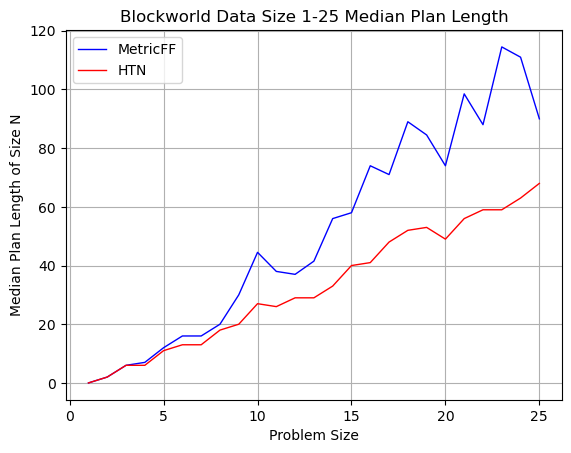

In [25]:
plt.title("Blockworld Data Size 1-25 Median Plan Length")
plt.xlabel("Problem Size")
plt.ylabel("Median Plan Length of Size N")

plt.plot(problem_size, metric_length_median, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_length_median, color='red', linewidth = 1,  label = 'HTN')
# show a legend on the plot
plt.legend()

# plt.plot(problem_size, median)
plt.grid()
plt.savefig('bw_length_median.png')
plt.show()

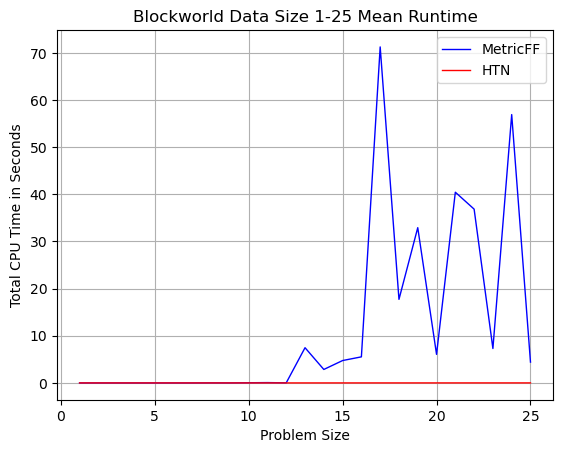

In [83]:
plt.title("Blockworld Data Size 1-25 Mean Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

# plt.plot(problem_size, mean)
plt.plot(problem_size, mean, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_mean, color='red', linewidth = 1,  label = 'HTN')
plt.legend()
plt.grid()
plt.savefig('bw_mean.png')
plt.show()

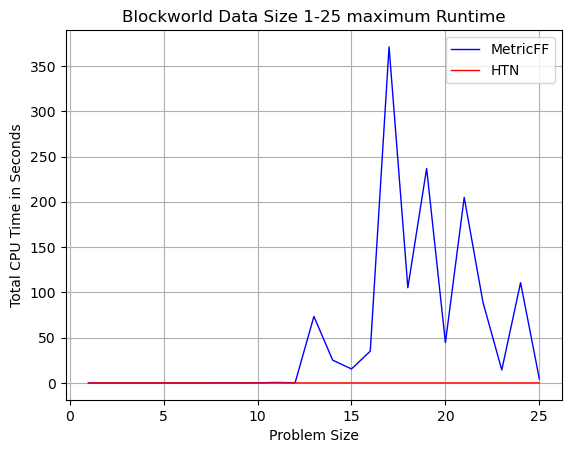

In [84]:
plt.title("Blockworld Data Size 1-25 maximum Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

# plt.plot(problem_size, maximum)
plt.plot(problem_size, maximum, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_maximum, color='red', linewidth = 1,  label = 'HTN')
plt.legend()
plt.grid()
plt.savefig('bw_maximum.png')
plt.show()

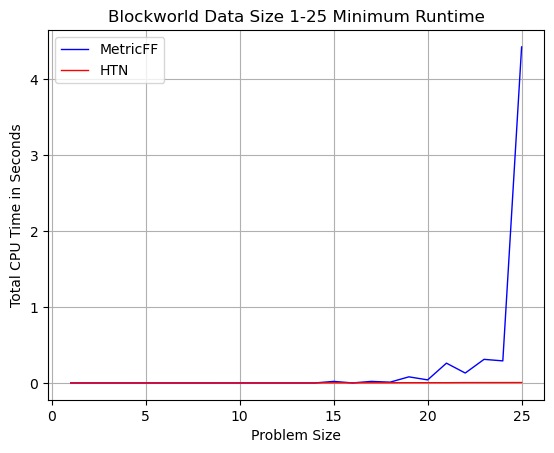

In [85]:
plt.title("Blockworld Data Size 1-25 Minimum Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

# plt.plot(problem_size, minimum)
plt.plot(problem_size, minimum, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_minimum, color='red', linewidth = 1,  label = 'HTN')
plt.legend()
plt.grid()
plt.savefig('bw_minimum.png')
plt.show()

In [40]:
import statistics
problem_size = []
median, mean = [], []
for k, v in result.items():
    problem_size.append(k)
    median.append(statistics.median(v))
    mean.append(statistics.mean(v))

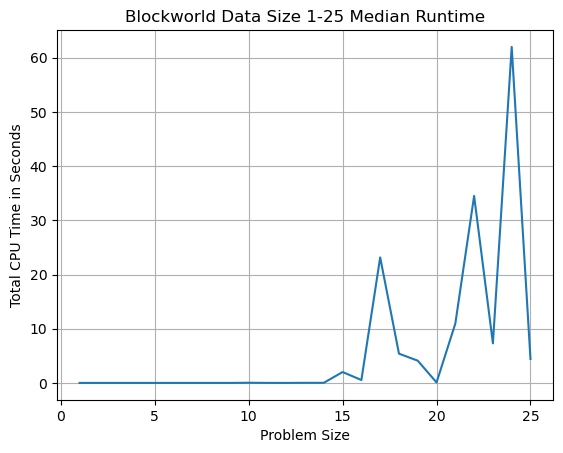

In [37]:
plt.title("Blockworld Data Size 1-25 Median Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

plt.plot(problem_size, median)
plt.grid()
plt.savefig('bw')
plt.show()

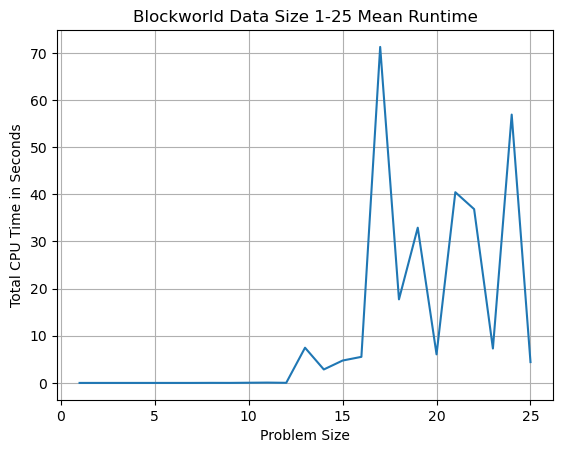

In [42]:
plt.title("Blockworld Data Size 1-25 Mean Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

plt.plot(problem_size, mean)
plt.grid()
plt.savefig('bw_mean')
plt.show()

In [31]:
from plotnine import *
def plot(data, xlabel, ylabel, title):
    data_long = pd.melt(data, id_vars=['k'], var_name='CPU Time', value_name='perplexity')

    # Create line plot
    return ggplot(data_long, aes(x='k', y='perplexity', color='model', group='model')) \
        + geom_line() \
        + xlab(xlabel) \
        + ylab(ylabel) \
        + ggtitle(title) \
        + theme_minimal()
    

/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: plotnine-save-8795218689208.pdf


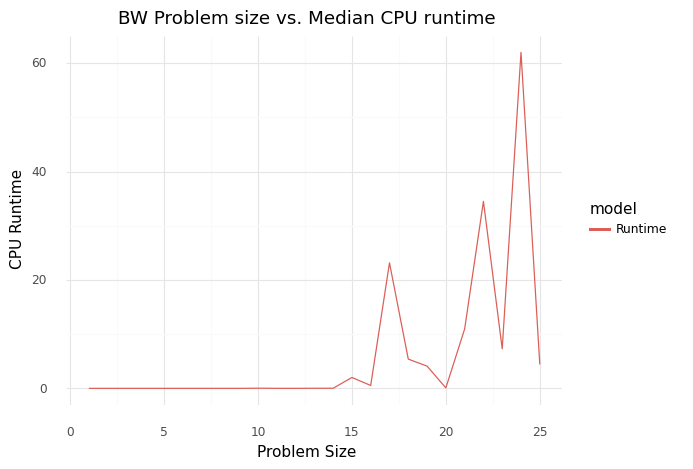

<ggplot: (8795218689208)>

In [38]:
data = pd.DataFrame({
    'k': problem_size,
    'Runtime': median
})

plot_res = plot(data, 'Problem Size', 'CPU Runtime', 'BW Problem size vs. Median CPU runtime')
ggsave(plot_res,file='Training_accuracy.png')
plot_res

/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: plotnine-save-8795218435591.pdf


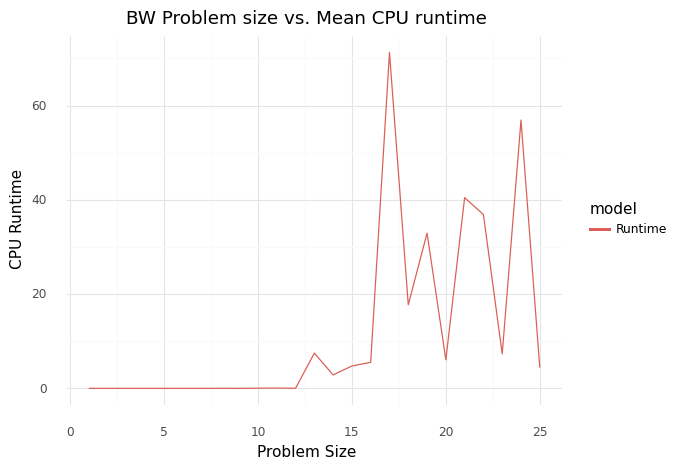

<ggplot: (8795218435591)>

In [41]:
data = pd.DataFrame({
    'k': problem_size,
    'Runtime': mean
})

plot_res = plot(data, 'Problem Size', 'CPU Runtime', 'BW Problem size vs. Mean CPU runtime')
ggsave(plot_res,file='Training_accuracy.png')
plot_res

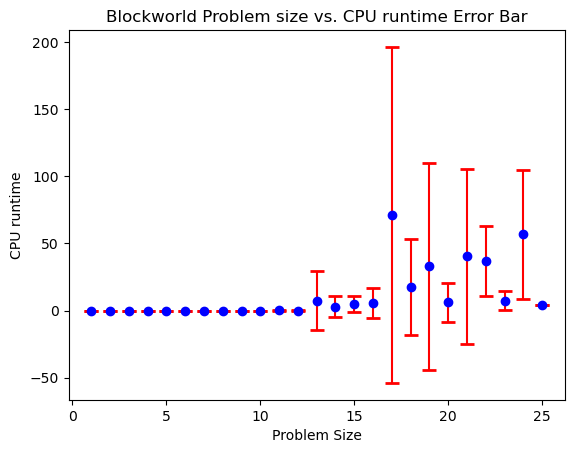

In [44]:
import numpy as np
x = []
y = []
yerr = []

for key, values in result.items():
    x.append(key)
    y.append(np.mean(values))
    yerr.append(np.std(values))

# Plot the error bars
plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=5, capthick=2, ecolor='red', markerfacecolor='blue', markeredgecolor='blue')

# Customize the plot
plt.xlabel('Problem Size')
plt.ylabel('CPU runtime')
plt.title('Blockworld Problem size vs. CPU runtime Error Bar')

# Display the plot
plt.show()